In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import randn

## Define and visualize the problem for $q=2$ and $q=4$

In [2]:
def f(theta, q):
    assert q > 1
    if np.abs(theta) < 1:
        return np.abs(theta) ** q
    elif theta > 1:
        return q * (theta - 1) + 1
    else:
        return q * (np.abs(theta) - 1) + 1

In [3]:
def gradient(theta, q):
    assert q > 1
    if np.abs(theta) < 1:
        return np.sign(theta) * q * np.abs(theta) ** (q - 1)
    else:
        return np.sign(theta) * q

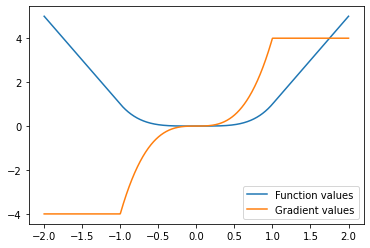

In [23]:
q = 4
x = np.linspace(-2, 2, 1000)
fx = np.array([f(xx, q) for xx in x])
gx = np.array([gradient(xx, 4) for xx in x])
plt.figure()
plt.plot(x, fx, label="Function values")
plt.plot(x, gx, label="Gradient values")
# plt.title(fr"$f(x) = \vert x \vert ^{q}$")
plt.legend()
plt.savefig(f"../memoir/figures/fig1-f-{q}.png", dpi=600)

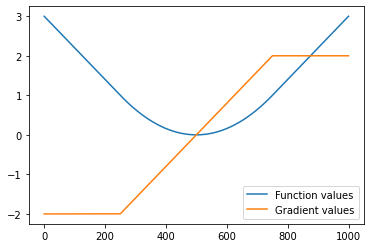

In [24]:
q = 2
x = np.linspace(-2, 2, 1000)
fx = np.array([f(xx, q) for xx in x])
gx = np.array([gradient(xx, q) for xx in x])
plt.figure()
plt.plot(fx, label="Function values")
plt.plot(gx, label="Gradient values")
# plt.title(fr"$f(x) = \vert x \vert ^{q}$")
plt.legend()
plt.savefig(f"../memoir/figures/fig1-f-{q}.png", dpi=600)

## Implement SGD and averaged SGD

In [6]:
def gamma(C, alpha, t):
    return C / t ** alpha

In [7]:
def sgd(fn, gradient_fn, gamma_fn, theta_0):
    # initialization
    theta = theta_0()

    # logging
    hist = []

    # iteration
    for it in range(1, n):
        g = gradient_fn(theta)
        theta -= gamma_fn(it) * g

        hist.append([theta, fn(theta)])
    return hist

In [8]:
def sgd_ave(fn, gradient_fn, gamma_fn, theta_0):
    # initialization
    theta = theta_0()
    theta_ave = np.copy(theta)

    # logging
    hist = []

    # iteration
    for it in range(1, n):
        g = gradient_fn(theta)
        theta -= gamma_fn(it) * g
        theta_ave = ((it - 1) * theta_ave + theta) / (it + 1)
        hist.append([theta_ave, fn(theta_ave)])
    return hist

Define (technical) experiment functions.

In [9]:
def sgd_xp(q, sigma_noise, N, C, alpha):
    res = []
    for _ in range(N):
        res.append(
            np.array(
                sgd(
                    lambda x: f(x, q),
                    lambda x: gradient(x, q) + sigma_noise * randn(),
                    lambda x: gamma(C, alpha, x),
                    theta_0,
                )
            )
        )
    res = np.array(res)
    hparams = {"q": q, "C": C, "alpha": alpha}
    return (res[:, :, 1] - res[:, :, 1].min(axis=1)[:, np.newaxis]).mean(
        axis=0
    ), hparams

In [10]:
def sgd_ave_xp(q, sigma_noise, N, C, alpha):
    res = []
    for _ in range(N):
        res.append(
            np.array(
                sgd_ave(
                    lambda x: f(x, q),
                    lambda x: gradient(x, q) + sigma_noise * randn(),
                    lambda x: gamma(C, alpha, x),
                    theta_0,
                )
            )
        )
    res = np.array(res)
    hparams = {"q": q, "C": C, "alpha": alpha}
    return (res[:, :, 1] - res[:, :, 1].min(axis=1)[:, np.newaxis]).mean(
        axis=0
    ), hparams

## Simulation parameters

In [11]:
theta_0 = lambda: -2.0

In [12]:
n = int(1e5)

In [13]:
q = 2

In [14]:
C = 1

In [15]:
alpha = 0.5

In [16]:
N = 100

In [17]:
sigma_noise = 4

In [18]:
alpha_list = [1 / 3, 1 / 2, 2 / 3, 1]

In [19]:
sgd_res = []
for alpha in alpha_list:
    sgd_res.append(sgd_xp(q, sigma_noise, N, C, alpha))

In [20]:
sgd_ave_res = []
for alpha in alpha_list:
    sgd_ave_res.append(sgd_ave_xp(q, sigma_noise, N, C, alpha))

In [21]:
cmap = plt.cm.tab10

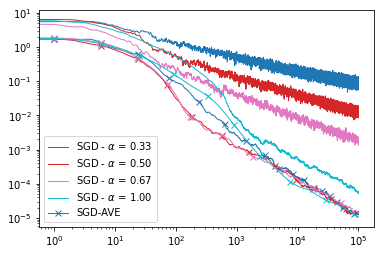

In [22]:
plt.figure()
n_lines = len(sgd_res)
color_idx = np.linspace(0, 1, n_lines)
for i, (means, params) in enumerate(sgd_res):
    plt.loglog(
        means,
        color=cmap(color_idx[i]),
        label=fr"SGD - $\alpha$ = {params['alpha']:.2f}",
        linewidth=1,
    )
for i, (means, params) in enumerate(sgd_ave_res):
    plt.loglog(
        means,
        color=cmap(color_idx[i]),
        label=fr"SGD-AVE" if i == 0 else None,
        marker="x",
        markevery=0.1,
        linewidth=1,
    )
plt.legend()
plt.show()
# plt.savefig(f"../memoir/figures/fig1-{q}.png", dpi=600)